<a href="https://colab.research.google.com/github/RafaelSigmoidal/Airbnb_Chicago/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Chicago*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior 
empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

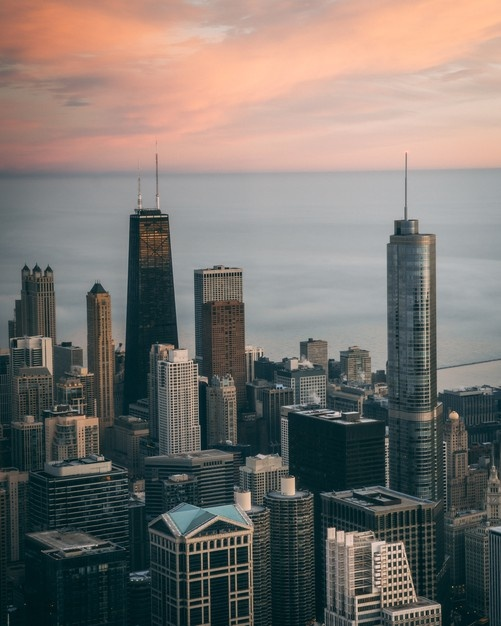

## Chicago 

A Cidade com famosa linha do horizonte de Chicago em contraste com a deslumbrante orla do Lago Michigan Assim que seus pés tocarem o chão, você perceberá instantaneamente essa beleza que mistura o urbano e a natureza na terceira maior cidade do país. No coração do Centro-Oeste, Chicago conta com arranha-céus enormes, 77 bairros cheios de cor, lagos que somam 42 quilômetros de orla, 26 praias e 580 parques e espaços naturais.

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/visualisations/listings.csv")

Importado todos os dados necessarios para Análise e limpeza do nosso Dataset

## Análise dos Dados


# **Dicionário das variáveis**

* **id** - Codigo de indentificação do imovel
* **name** - Nome da Propriedade 
* **host_id** - Codigo de indentificação do proprietario
* **host_name** - Nome do Proprietario 
* **neighbourdhood_group** - Dados invalidos
* **neighbourhood** - Bairro do imóvel
* **latitude** - Cordenada de latitude da propriedade
* **Longitude** - Cordenada da longitude da propriedade 
* **room_type** - Tipo de quarto oferecido
* **price** - preço do aluguel do imovel 
* **minimum_ nights** - Quantidade minima de noites para Reservar 
* **number_of_reviews** - Numero de Reviews que propriedade possui
* **last_review** -  Data do ultimo review 
* **reviews_per_month** - Quantidade de Reviews por mês
* **calculates_host_listing_count** - Quantidade de imoveis do mesmo proprietario
* **availability_365** - Numero de dias de disponibilidade no ano
* **license** - lincença do imovel 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,81,3,190,2021-09-24,2.41,1,329,10,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,65,2,414,2021-10-06,3.34,1,230,29,R18000034991
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,125,4,36,2021-10-04,0.40,7,144,16,2120297
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,13,2021-10-16,0.16,1,0,4,City registration pending
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.09,1,167,3,R20000055258


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print ("Entradas: {}".format(df.shape[0]))
print ("Variaveis: {}".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 6528
Variaveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Na base utilizada, da cidade de Chicago, são 6.528 linhas e 18 colunas, as quais chamaremos de entradas e variáveis, respectivamente. A última atualização da base de dados utilizada foi no dia 27 dezembro de 2021.



### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum () / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.155944
last_review                       0.155944
license                           0.067708
host_name                         0.000460
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

A coluna de neighbourd_group apresenta de cerca 100% dos seus dados ausentes,e logo em seguida as colunas de reviews_per_month, last_review e License com pequenas porcetagens de valores ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

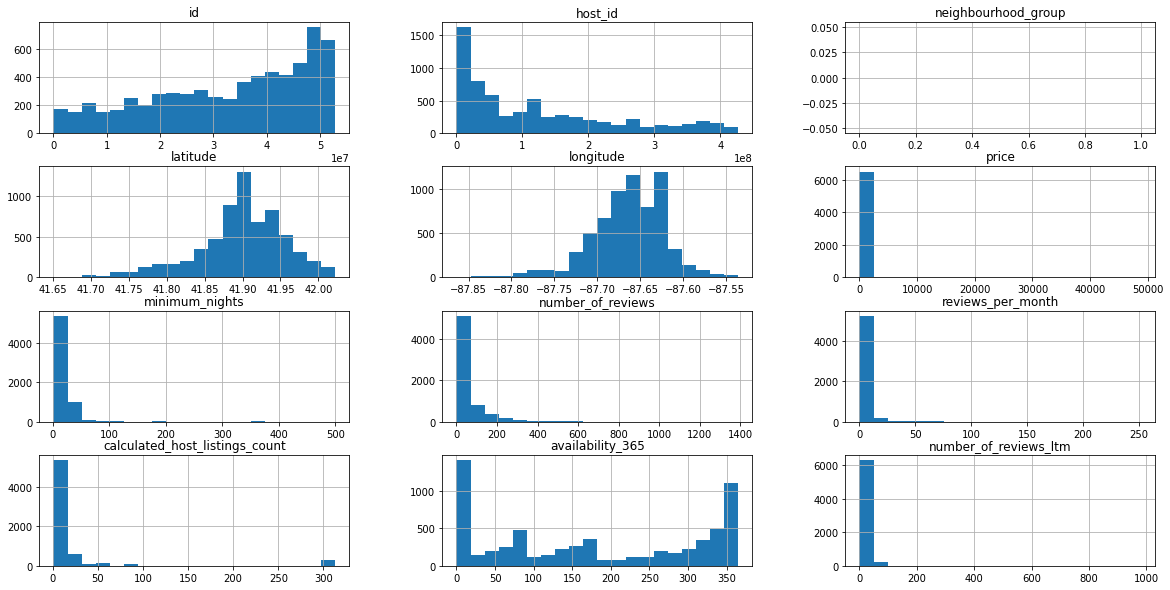

In [ ]:
# plotar o histograma das variáveis numérico
df.hist(bins=20, figsize=(20,10));


# **Outliers?**

In [ ]:
df[['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6528.000000,6528.000000,6528.000000,5510.000000,6528.000000,6528.000000
mean,299.258425,9.211397,46.377145,3.521632,22.345895,178.385110
std,2319.930240,22.728897,75.133071,7.855918,66.699864,137.490354
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,1.000000,2.000000,0.530000,1.000000,44.000000
50%,119.000000,2.000000,16.000000,1.720000,2.000000,166.000000
75%,190.000000,4.000000,57.000000,3.760000,9.000000,327.000000
max,48864.000000,500.000000,1390.000000,252.000000,313.000000,365.000000


minumum_nights: valores acima de 60:
73 entradas
1.118260%


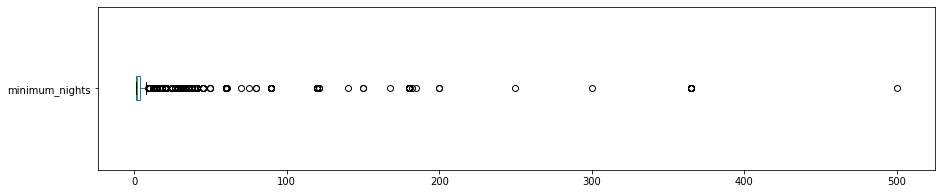

In [ ]:
#minumum nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))
plt.show
# ver quantidade de valores acima de 60 dias
print("minumum_nights: valores acima de 60:")
print("{} entradas".format(len(df[df.minimum_nights > 60])))
print("{:4f}%".format((len(df[df.minimum_nights >60])/ df.shape[0])*100))

price:valores acima de 1000:
82 Entradas
0.000000%


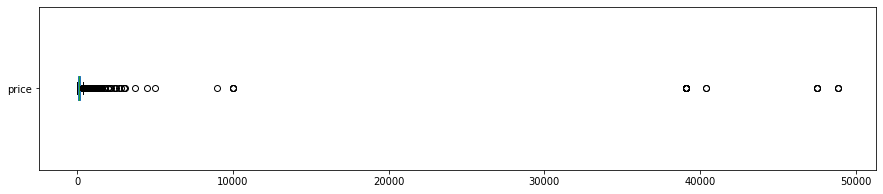

In [ ]:
# price
df.price.plot(kind='box',vert=False,figsize=(15,3))
plt.show
# ver quantidade de valores acima 1000
print("price:valores acima de 1000:")
print("{} Entradas".format(len(df[df.price> 1000])))
print("{:4f}%".format((len(df[df.minimum_nights >1000]) / df.shape[0])*100))

Analisado os graficos foi verificado que o dataset contém algum dados muitos discrepantes dos outros, e com isso sera feita uma limpeza nesses dados para uma análise mais assertiva. (Pesquisas mais aprofundadas devem ser feitas)

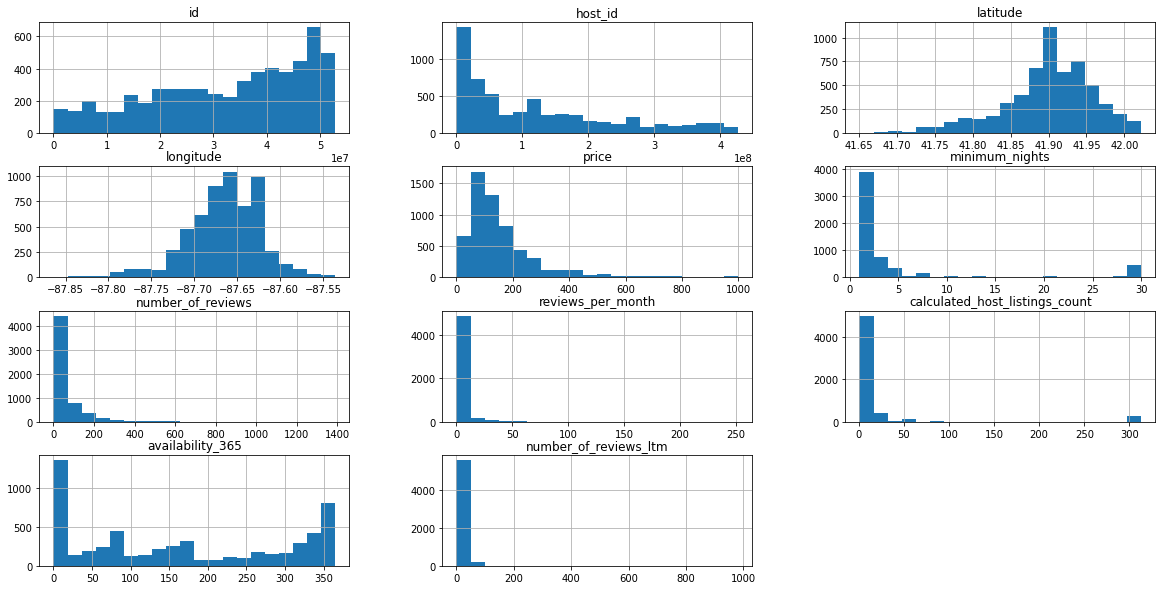

In [ ]:
#histogramas sem *outliers*
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#remover coluna
df_clean.drop('neighbourhood_group',axis=1,inplace=True)

#plotar novos graficos
df_clean.hist(bins=20, figsize=(20,10));

Feito a limpeza dos outliers, agora podemos refazer a análise com os dados mais assertivos e tendo assim uma conclusão sobre os melhores preços e localização.

Pondendo assim observar a maior parte dos preços se concentra entre 1 a 200 dollars e mínimo de noites tambem.

In [ ]:
print ("Linhas: {}".format(df_clean.shape[0]))
print ("colunas: {}".format(df_clean.shape[1]))

Linhas: 5816
colunas: 17


Numero de Entradas e Variáveis depois de ser feita a limpeza necessaria do outlliers.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

156.72077028885832

O preço médio para se hospedar em Chicago é de $156.70 (R$ 883,76), em uma estadia de 1 semana, você terá que desembolsar $1096.90 (R$6186,30).

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
display(corr)




# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,-0.029385,-0.104104,-0.028468,0.098998
minimum_nights,-0.029385,1.000000,-0.190754,-0.110399,0.130114
number_of_reviews,-0.104104,-0.190754,1.000000,0.191675,0.025991
reviews_per_month,-0.028468,-0.110399,0.191675,1.000000,0.100904
availability_365,0.098998,0.130114,0.025991,0.100904,1.000000


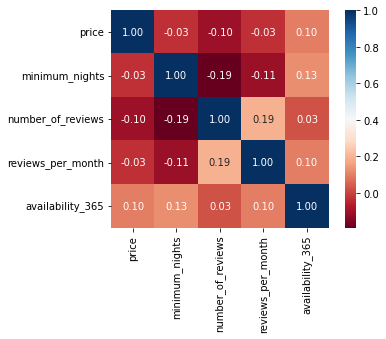

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com o grafico podemos osbservar as correlações envolvendo os preços, minimo de noites, numeros de reviews e entre outros.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4142
Private room       1524
Shared room          90
Hotel room           60
Name: room_type, dtype: int64

O Airbnb nos dá 4 opções de locação de imóvel, elas são, casa/apartamento inteiro, quarto privado, quarto compartilhado além de possuir anúncios de quartos de hotel. Para uma melhor visualização, montamos então um tabela para mostrar os tipos de imóvel mais anunciados de acordo com nossa base de dados.

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    71.217331
Private room       26.203576
Shared room         1.547455
Hotel room          1.031637
Name: room_type, dtype: float64

O tipo de imovel mais alugado no airbnb da cidade de Chicago são casas/apartamentos , sendo cerca de 71% das buscas de seus clientes.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:76]
                                                                          
                                                                          

neighbourhood
Loop               221.879310
Near North Side    207.922010
Near South Side    207.769231
Lincoln Park       204.507874
Burnside           200.000000
                      ...    
Chicago Lawn        59.750000
South Chicago       58.318182
Mckinley Park       57.210526
West Englewood      41.000000
West Lawn           38.333333
Name: price, Length: 76, dtype: float64

A Localidade mais cara do dataset de Chicago e a regiao do loop que e caracterizado por ser uma área vibrante com restaurantes ecléticos, lojas, teatros e parques. Composto principalmente de arranha-céus, também abriga a Willis Tower, com 108 andares. A icônica escultura "Cloud Gate" fica no Millennium Park. O Grant Park apresenta a grande fonte de Buckingham, em estilo rococó, e o renomado Art Institute of Chicago, e organiza eventos anuais como o The Taste of Chicago e o Lollapalooza , e tem um preço medio de 221 dollars por dia e sendo a assim umas das regioes mais caras de chicago.

### **Q6. Qual a localidade mais barata do dataset?**

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
West Lawn          38.333333
West Englewood     41.000000
Mckinley Park      57.210526
South Chicago      58.318182
Chicago Lawn       59.750000
Fuller Park        62.000000
Avalon Park        65.000000
Calumet Heights    65.148148
Norwood Park       65.677419
Mount Greenwood    66.000000
Name: price, dtype: float64

A região se encontra em uma das localidades menos valorizado de Chicago (no Airbnb) é o West Lawn, e um bairro predominantemente residencial e um do mais perigosos que fica ao sudeste de Chicago sendo assim um pouco longe de pontos turísticos da cidade de Chicago e faz parte das 77 áreas comunitárias e tendo como preço médio de aluguel por noite de 38 Dollars cerca de 216,38 Reais.

In [ ]:
mapa = folium.Map(location=[ 41.881832	, -87.623177 ], zoom_start= 10)
coordenadas= []
for lat, lng in zip(df_clean.latitude, df_clean.longitude):
    coordenadas.append([lat,lng])
    
mapa.add_child(plugins.MarkerCluster(coordenadas))
mapa



Se juntarmos as informações de latitude, longitude e o nome do bairro, podemos assim montar um mapa com as principais regiões de Chicago (onde se tem mais imóveis anunciados no Airbnb).

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.839924346629986

A média de noites mínimas para se alugar uma propriedade no Airbnb de Chicago é de 5 noites mínimas, o que correlacionado com o preço médio das propriedades, nos dá um total de $783.5 (R$ 4418,78).Tipo de Imóvel Mais Anunciados.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis( PRECISA SER FEITA UMA ANÁLISE MAIS EXPLORATÓRIA)

Com os dados analisados do dataset podemos analisar as regiões mais caras de Chicago, as correlações dos preços com outros fatores, verificando se tem alguma coisa que interligar os resultados, mas podemos indetificar que a cidade de chicago tem uma taxa de preço bem controlada, média de minimos de noite e muito elevado na cidade devido ao crescimento na área turisticas devido alguns fatores principais de sua cidade como (arquiterura,setor empresarial,Parques e cultura).

 

